In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from julia import Main
Main.include("D:/Libraries/Documents/Scripts/Cold_Snap/Heat_Wave_Cold_Snap_ID_ASOS.jl")

%matplotlib inline
%load_ext julia.magic

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [48]:
parent_dir = "D:/Libraries/Documents/Scripts/"
pattern = "ID_BOI_*"
files_to_read = Main.find_files(parent_dir,pattern,".txt")

 │Number of files: 1

In [49]:
files_to_read

['D:/Libraries/Documents/Scripts/IEM_Ex_Scripts\\ID_BOI_190001010000_202107140000.txt']

In [50]:
df = Main.load_ASOS(files_to_read)

%julia describe(py"df")

In [51]:
# Temperature
df1 = Main.format_data("Temp", df)
temp_thresh = 75.       # Temp thrshold,  F for ASOS, C for USCRN
df2 = Main.extract_runs("Temp",temp_thresh, df1)

# Sky Cover
df1 = Main.format_data("Sky_C", df)
skycvr_thresh = 2       # skycover thrshold,  ("   "=>4., "SKC"=>4., "NCD"=>3., "CLR"=>3., "NSC"=>3., "FEW"=>2., "SCT"=>2., "BKN"=>1., "OVC"=>0., "VV "=>0.)
df2 = Main.extract_runs("Sky_C",skycvr_thresh, df1)

## will need to remove comments around line 138 in .jl file (not set up w/ if statement) 

In [60]:
min_duration = 60.0    # Minimum Duration, in Minutes, inclusive
res = df2
show = True            # Show Output dataframe
print("BOISE MUNICIPAL, ASOS, Runs of Temperature >= 75° F\nPeriod of Record: 1931_01_01_0700-2021_07_13_2355\nNOTE: observation frequency varries over record, maximum nominal: 1hour")
df3 = Main.temporal_filter(min_duration, "above", res, show)

BOISE MUNICIPAL, ASOS, Runs of Temperature >= 75° F
Period of Record: 1931_01_01_0700-2021_07_13_2355
NOTE: observation frequency varries over record, maximum nominal: 1hour
 │15×11 DataFrame
│ Row │ UTC_BEGIN_DATETIME  │ UTC_END_DATETIME    │ UTC_MAX_TIMESTEP │
│     │ DateTime            │ DateTime            │ Int64            │
├─────┼─────────────────────┼─────────────────────┼──────────────────┤
│ 1   │ 2006-07-22T13:53:00 │ 2006-07-26T08:53:00 │ 7200000          │
│ 2   │ 2014-07-11T14:53:00 │ 2014-07-15T08:53:00 │ 72000000         │
│ 3   │ 2013-06-30T14:53:00 │ 2013-07-04T07:53:00 │ 14400000         │
│ 4   │ 2002-07-12T13:56:00 │ 2002-07-15T06:56:00 │ 7200000          │
│ 5   │ 1971-08-04T18:00:00 │ 1971-08-07T09:00:00 │ 10800000         │
│ 6   │ 2003-07-22T13:53:00 │ 2003-07-25T03:53:00 │ 3600000          │
│ 7   │ 2004-07-16T13:53:00 │ 2004-07-19T02:53:00 │ 3600000          │
│ 8   │ 1960-07-28T15:00:00 │ 1960-07-31T01:00:00 │ 3600000          │
│ 9   │ 2015-06-28T12:53:00

In [53]:
filter_month = 1
month_mask = df3['UTC_BEGIN_DATETIME'].map(lambda x: x.month) == filter_month
df4 = df3[month_mask]

#filter_year = 2000
#month_mask = df4['UTC_BEGIN_DATETIME'].map(lambda x: x.year) == filter_year
#df4[month_mask]#['UTC_DURATION'].sum()

In [54]:
for y in range(1900, 2020):
    filter_year = y
    month_mask = df4['UTC_BEGIN_DATETIME'].map(lambda x: x.year) == filter_year
    total_time = df4[month_mask]['UTC_DURATION'].sum()
    print(f"Year: {y} Month: {filter_month}, Sum: {total_time} " )

Year: 1900 Month: 1, Sum: 0 days 00:00:00 
Year: 1901 Month: 1, Sum: 0 days 00:00:00 
Year: 1902 Month: 1, Sum: 0 days 00:00:00 
Year: 1903 Month: 1, Sum: 0 days 00:00:00 
Year: 1904 Month: 1, Sum: 0 days 00:00:00 
Year: 1905 Month: 1, Sum: 0 days 00:00:00 
Year: 1906 Month: 1, Sum: 0 days 00:00:00 
Year: 1907 Month: 1, Sum: 0 days 00:00:00 
Year: 1908 Month: 1, Sum: 0 days 00:00:00 
Year: 1909 Month: 1, Sum: 0 days 00:00:00 
Year: 1910 Month: 1, Sum: 0 days 00:00:00 
Year: 1911 Month: 1, Sum: 0 days 00:00:00 
Year: 1912 Month: 1, Sum: 0 days 00:00:00 
Year: 1913 Month: 1, Sum: 0 days 00:00:00 
Year: 1914 Month: 1, Sum: 0 days 00:00:00 
Year: 1915 Month: 1, Sum: 0 days 00:00:00 
Year: 1916 Month: 1, Sum: 0 days 00:00:00 
Year: 1917 Month: 1, Sum: 0 days 00:00:00 
Year: 1918 Month: 1, Sum: 0 days 00:00:00 
Year: 1919 Month: 1, Sum: 0 days 00:00:00 
Year: 1920 Month: 1, Sum: 0 days 00:00:00 
Year: 1921 Month: 1, Sum: 0 days 00:00:00 
Year: 1922 Month: 1, Sum: 0 days 00:00:00 
Year: 1923 

C:\Users\Junegrass\Miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: arange: cannot compute length

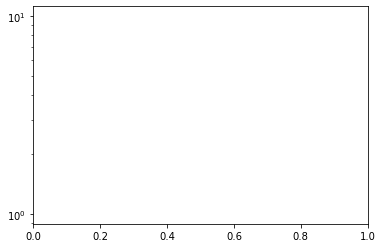

In [56]:
sns.histplot(data=df3, x="MEAN_TEMP", y="DEGREE_MINS", 
            log_scale=(False, True), discrete=(True, False),
            pthresh=.05, pmax=.9,
            cbar=True,cbar_kws=(dict(shrink=.75, label="Cumulative Count")))

<AxesSubplot:xlabel='year', ylabel='month'>

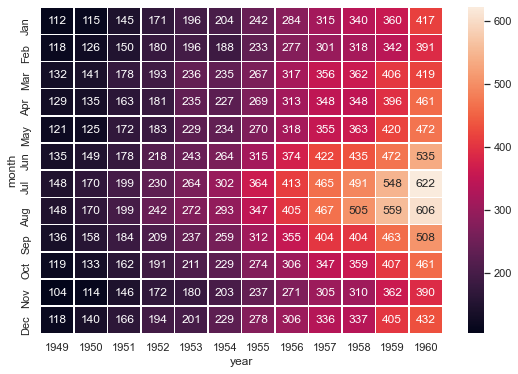

In [10]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)